In [1]:
import pandas as pd
import numpy as np

##### DATA

In [2]:
amzn = pd.read_csv(r'D:\IMARTICUS\AmazonFoodReviews.csv')

In [3]:
amzn.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
#amzn = amzn.sample(n=50000, random_state=42)

##### Preprocessing of Data 

In [5]:
amzn = amzn[['Score','Text']]        # Selecting only Relevant columns from our dataset

#### To simplify the analysis of our model, we have converted the original 5-star ratings into three categories. A score of 1 or 2 is considered negative, 3 is considered neutral, and scores of 4 or 5 are considered positive. This allows us to create a 3x3 confusion matrix, where 1 represents negative text, 2 represents mostly neutral text, and 3 represents positive text.

In [6]:
amzn.Score.replace({2:1,3:2,4:3,5:3},inplace =True)

In [7]:
amzn.head(2)

,Score,Text
0,3,I have bought several of the Vitality canned d...
1,1,Product arrived labeled as Jumbo Salted Peanut...


In [8]:
amzn.isnull().sum()

Score    0
Text     0
dtype: int64

In [9]:
amzn.Text = amzn.Text.str.lower()

In [10]:
import nltk
import string

In [11]:
from nltk.corpus import stopwords

In [12]:
l1 = stopwords.words('english')  #this shows the stopwords later we will remove it


In [13]:
def text_process(mess):            ### creating a function
    """                                                        ## a docstring
    1. remove the punctuation
    2. remove the stopwords
    3. return the list of clean textwords
    
    """
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = "".join(nopunc)
    
    return [ word for word in nopunc.split() if word not in l1]

In [14]:
#amzn['Text'].apply(text_process)

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

In [16]:
text_count = CountVectorizer(analyzer= text_process).fit(amzn['Text'])

In [17]:
len(text_count.vocabulary_ )

240626

In [18]:
df_x = text_count.transform(amzn['Text'])

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test = train_test_split(df_x,amzn.Score,test_size=.2)

In [21]:
#-------------------------------------------------------------------------------------------------------------------------------

##### Model Building

In [22]:
from sklearn.naive_bayes  import MultinomialNB 
nb  = MultinomialNB()

In [23]:
nb.fit(x_train,y_train)

MultinomialNB()

In [24]:
pr = nb.predict(x_test)

In [25]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [26]:
confusion_matrix(y_test,pr)

array([[10760,   971,  4608],
       [ 1657,  2264,  4603],
       [ 3279,  2081, 83468]], dtype=int64)

In [27]:
accuracy_score(y_test,pr)*100

84.87215346861228

#### Naive Bayes is considered a suitable algorithm for sentiment analysis due to its utilization of conditional probability to make predictions. It has demonstrated an impressive accuracy rate of around 82%. In addition, sentiment analysis techniques often incorporate tools like Vader and TextBlob to assess the polarity of reviews and delve deeper into the analysis of sentiment.

In [28]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sent = SentimentIntensityAnalyzer()

In [29]:
polarity_score = []

for i in range(0,amzn.shape[0]):
    ans = sent.polarity_scores(amzn.Text[i])
    polarity_score.append(ans['compound'])

In [30]:
from textblob import TextBlob

In [31]:
textblob_score = []


for i in range(0,amzn.shape[0]):
    ans = TextBlob(amzn.Text[i])
    textblob_score.append(ans.sentiment[0])

In [32]:
df = pd.DataFrame()

In [33]:
df['compound'] = polarity_score
df['text_blob'] = textblob_score

In [34]:
df.head()

,compound,text_blob
0,0.9441,0.450000
1,-0.5664,-0.033333
2,0.8265,0.133571
3,0.0000,0.166667
4,0.9468,0.483333


In [35]:
df.text_blob.describe(percentiles=[.1,.2,.3,.4,.5,.6,.7,.8,.9,1])

count    568454.000000
mean          0.241550
std           0.224776
min          -1.000000
10%          -0.003311
20%           0.075000
30%           0.133333
40%           0.184091
50%           0.231786
60%           0.280769
70%           0.337500
80%           0.409091
90%           0.515044
100%          1.000000
max           1.000000
Name: text_blob, dtype: float64

In [36]:
df.compound.describe(percentiles=[.1,.2,.3,.4,.5,.6,.7,.8,.9,1])

count    568454.000000
mean          0.646534
std           0.465724
min          -0.999400
10%          -0.101000
20%           0.440400
30%           0.666300
40%           0.785200
50%           0.852700
60%           0.897400
70%           0.928300
80%           0.953300
90%           0.974400
100%          0.999900
max           0.999900
Name: compound, dtype: float64

In [37]:
import matplotlib.pyplot as plt

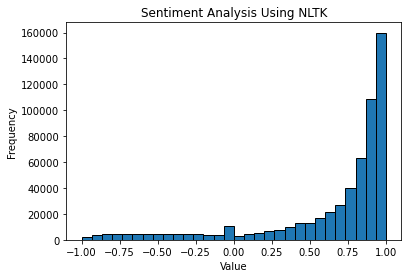

In [38]:
plt.hist(df.compound,bins =30,edgecolor='black');
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Sentiment Analysis Using NLTK')
plt.show()

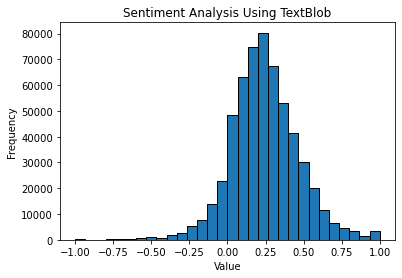

In [39]:
plt.hist(df.text_blob,bins =30,edgecolor='black');
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Sentiment Analysis Using TextBlob')
plt.show()

In [40]:
COUNT_Positive = df[df.compound > 0.25].shape[0]
COUNT_negative = df[df.compound < -0.25].shape[0]

In [41]:
print("Percentage of total positive reviews According to nltk Compound Score: {:.2f}".format(COUNT_Positive*100/df.shape[0]),'%')
print("Percentage of total negative reviews According to nltk Compound Score: {:.2f}".format(COUNT_negative*100/df.shape[0]),'%')
print("Percentage of total Neutral reviews According to nltk Compound Score: {:.2f}".format((df.shape[0] - (COUNT_Positive+COUNT_negative))*100/df.shape[0]),'%')

Percentage of total positive reviews According to nltk Compound Score: 84.42 %
Percentage of total negative reviews According to nltk Compound Score: 8.39 %
Percentage of total Neutral reviews According to nltk Compound Score: 7.19 %


#### Based on the graphs, it is evident that a majority of the review scores are above 0, indicating that most of the reviews are positive. According to the nltk Compound Score, approximately 84.42% of the total reviews can be classified as positive, while 8.39% can be considered negative. The remaining 7.19% of reviews are categorized as neutral.